###### Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under BSD 3-Clause License. (c)2018 Olivier Mesnard. Thanks: Microsoft Azure Sponsorship.

---

# Microsoft Azure Sponsorship: Cost Analysis

---

In [1]:
import os
import pandas
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.style.use('seaborn-dark')

# load style of notebook
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling(os.path.join('styles', 'custom.css'))

In [2]:
# Read csv file with billing details
filepath = os.path.join('data', 'AzureUsage_all.csv')
raw_data = pandas.read_csv(filepath)

In [3]:
raw_data.columns

Index(['SubscriptionName', 'SubscriptionGuid', 'Date', 'ResourceGuid',
       'ServiceName', 'ServiceType', 'ServiceRegion', 'ServiceResource',
       'Quantity', 'Cost'],
      dtype='object')

Our Azure bill reports:

* `SubscriptionName`, the name of the subscription (`Microsoft Azure Sponsorship` in our case);
* `SubscriptionGuid`, the id of the subscription (`{4C217C02-7B06-42DA-B13C-E8DE392FBD00}` in our case);
* `Date`, the date of the charge;
* `ResourceGuid`;
* `ServiceName`;
* `ServiceType`;
* `ServiceRegion`;
* `ServiceResource`;
* `Quantity`;
* `Cost`.

We do not need all columns for our cost analysis; let's keep only the interesting ones: `Date`, `ServiceName`, `ServiceType`, `ServiceRegion`, `ServiceResource`, `Quantity`, and `Cost`.

In [4]:
# Keep interesting columns
columns = ['Date', 'ServiceName', 'ServiceType',
           'ServiceRegion', 'ServiceResource',
           'Quantity', 'Cost']
data = raw_data[columns]

In [5]:
print('Start: {}, end: {}'.format(data['Date'].values[0],
                                  data['Date'].values[-1]))
print('Total cost: {}'.format(data['Cost'].values.sum()))

Start: 4/30/2017, end: 1/3/2018
Total cost: 18436.588668610297


Microsoft Azure Sponsorship granted us \$20,000 to evaluate their cloud platform and run Computational Fluid Dynamics simulations with our in-house MPI-based software [PetIBM](https://github.com/barbagroup/PetIBM).
Between April 30, 2017 and January 3, 2018, we have spent \$18,437 on Microsoft Azure.

___

## Types of charge

___

In [6]:
data['ServiceName'].unique()

array(['Data Management', 'Virtual Machines', 'Networking', 'Storage'],
      dtype=object)

During that period, we have been charged for the following services:
* `Data Management`,
* `Virtual Machines`,
* `Networking`,
* `Storage`.

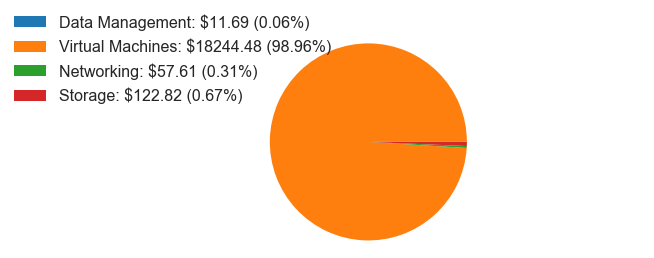

In [7]:
total_cost = data['Cost'].sum()
costs = {}
service_names = data['ServiceName'].unique()
for name in service_names:
    mask = data['ServiceName'] == name
    costs[name] = data[mask]['Cost'].sum()
    
fig, ax = pyplot.subplots(figsize=(10.0, 4.0))
sizes = [costs[name] / total_cost * 100.0
         for name in service_names]
labels = ['{}: ${:.2f} ({:.2f}%)'.format(name, costs[name], size)
          for name, size in zip(service_names, sizes)]
patches, _ = ax.pie(sizes)
fig.legend(patches, labels, loc='upper left', prop={'size': 16})
ax.axis('equal');

Ok, almost all of the charges are from the usage of virtual machines.

In [8]:
def print_resource_costs(data, service_name='All'):
    """
    Prints the cost of service resources for a given service name.
    
    Parameters
    ----------
    data: pandas.core.frame.DataFrame
        Input data with service name and service resources.
    service_name: string, optional
        Name of the service to display;
        choices: 'Data Management', 'Virtual Machines',
                 'Networking', 'Storage', or 'All';
        default: 'All'.
    """
    if service_name is not 'All':
        mask = data['ServiceName'] == service_name
        data = data[mask]
    service_names = data['ServiceName'].unique()
    for name in service_names:
        print(name)
        mask = data['ServiceName'] == name
        subdata = data[mask]
        service_resources = subdata['ServiceResource'].unique()
        for resource in service_resources:
            mask = subdata['ServiceResource'] == resource
            total_cost = subdata[mask]['Cost'].sum()
            print(' - {}: ${:.6f}'.format(resource, total_cost))
        print()

### Virtual Machines

In [9]:
print_resource_costs(data, service_name='Virtual Machines')

Virtual Machines
 - Compute Hours: $18244.480669



For the use of virtual machines, we have been charged for compute hours.
The compute hour price depends on the instance of virtual machine.
During our sponsorship, we used various instances as shown in the next code cell.

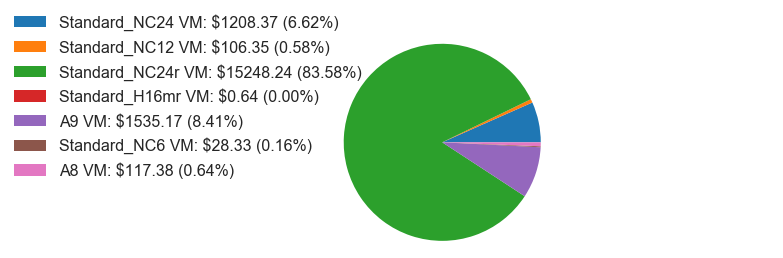

In [10]:
mask = data['ServiceName'] == 'Virtual Machines'
subdata = data[mask]
total_cost = subdata['Cost'].sum()
costs = {}
instances = subdata['ServiceType'].unique()
for instance in instances:
    mask = subdata['ServiceType'] == instance
    costs[instance] = subdata[mask]['Cost'].sum()

fig, ax = pyplot.subplots(figsize=(12.0, 4.0))
sizes = [costs[instance] / total_cost * 100.0
         for instance in instances]
labels = ['{}: ${:.2f} ({:.2f}%)'.format(instance, costs[instance],
                                         size)
          for instance, size in zip(instances, sizes)]
patches, _ = ax.pie(sizes)
fig.legend(patches, labels, loc='upper left', prop={'size': 16})
ax.axis('equal');

As seen above, we spent most of the money with the instances `Standard_NC24`, `Standard_NC24r`, and `A9`.

The `A9` instances were used to compare runtime obtained on test-cases between Microsoft Azure and our university-managed HPC cluster, [Colonial One](https://colonialone.gwu.edu/).

The instance `Standard_NC24` was mostly used to compute the three-dimensional flow around a snake cylinder with a 35-degree angle of attack at Reynolds number 2,000 on a structured grid with 46 million points.

The RDMA-capable instances `Standard_NC24r` were used for other runs of the same application but either with a finer grid (233 million points) or with a lower angle of attack (30 degrees), or with a smaller Reynolds number (1,000).
Those runs have been submitted with [Azure Batch service](https://docs.microsoft.com/en-us/azure/batch/) using the utility tool [Batch Shipyard](https://github.com/Azure/batch-shipyard).

### Data Management

In [11]:
print_resource_costs(data, service_name='Data Management')

Data Management
 - Standard IO - Table Read Operation Units (in 10,000s): $0.000016
 - Standard IO - Block Blob Write Operation Units (in 10,000s): $0.003969
 - Standard IO - Block Blob Read Operation Units (in 10,000s): $0.007115
 - Standard IO - Queue Operation Units (in 10,000s): $0.000046
 - Standard IO - File Protocol Operation Units (in 10,000s): $0.521066
 - Standard IO - File Read Operation Units (in 10,000s): $0.546279
 - Standard IO - Block Blob Delete Operation Units (in 10,000s): $0.000011
 - Standard IO - Table Write Operation Units (in 10,000s): $0.003419
 - Standard IO - Page Blob Write Operation Units (in 10,000s): $0.594375
 - Standard IO - Page Blob Read Operation Units (in 10,000s): $0.022818
 - Standard IO - Page Blob Delete Operation Units (in 10,000s): $0.006561
 - Standard IO - Block Blob List Operation Units (in 10,000s): $0.000007
 - Standard IO - File Write Operation Units (in 10,000s): $9.975102
 - Standard IO - File Delete Operation Units (in 10,000s): $0.00

### Networking

In [12]:
print_resource_costs(data, service_name='Networking')

Networking
 - Data Transfer In (GB): $0.000000
 - Data Transfer Out (GB): $55.726161
 - IP Address Hours: $1.880000



Networking charges include data transfer and allocation of public IP addresses.
`Data Transfer In` represents inbound transfer (data going into Azure data centers) and is free.
`Data Transfer Out` is outbound transfer (price depends on the quantity being transferred).
(More details about [data transfer charges](https://azure.microsoft.com/en-us/pricing/details/bandwidth/) and [IP address charges](https://azure.microsoft.com/en-us/pricing/details/ip-addresses/).)

### Storage

In [13]:
print_resource_costs(data, service_name='Storage')

Storage
 - Standard Managed Disk/S4 (Units): $8.084128
 - Standard IO - Block Blob (GB): $0.032647
 - Standard IO - Page Blob/Disk (GB): $57.113960
 - Standard IO - Files (GB): $56.785135
 - Standard IO - Table (GB): $0.002347
 - Standard Managed Disk/S10 (Units): $0.605381
 - Standard Managed Disk/S30 (Units): $0.192676
 - Standard IO - Queue Class 1 Operation Units: $0.000000



___

## 3D simulations of the flying snake

___

We ran simulations of the three-dimensional flow around a cylinder with an anatomically cross-section of the flying snake, _Chrysopelea paradisi_, on Microsoft Azure using two different meshes:

* mesh A: 46 million cells (1071x1072x40),
* mesh B: 233 million cells (1704x1706x80).

We started by computing 100 non-dimensional time-units of flow simulation on mesh A with a 35-degree angle of attack for the snake at Reynolds number 2,000, using a single instance NC24.
Then, we interpolated the final coarse solution on mesh B to compute 75 additional time units, using Azure Batch services on a pool with 6 NC24r nodes.
The computation on the fine mesh B was divided in three runs as there is a 7-day time-limit enforced on Batch tasks.

### Re=2,000, AoA=35$^o$ (mesh A)

The simulation was run on a single instance NC24 (featuring 4 NVIDIA K80 GPU devices) in the US South Central region during May, 2017.
We logged into the node, installed PetIBM-0.2 and all its dependencies;
we used PETSc-3.7.4 and the shared library AmgX-1.2.0-build108.
At that time, AmgX was not yet an open-source library but the shared library was accessible to CUDA-registered developers with a time-limited license.

In [14]:
# Get data for the NC24 instances
mask = data['ServiceType'] == 'Standard_NC24 VM'
subdata = data[mask]
# Get data for the US South Central region
mask = subdata['ServiceRegion'] == 'US South Central'
subdata = subdata[mask]
# Get data within a specific period
mask = ((pandas.to_datetime(subdata['Date']) >= '2017-05-01') &
        (pandas.to_datetime(subdata['Date']) <= '2017-05-31'))
subdata[mask]

,Date,ServiceName,ServiceType,ServiceRegion,ServiceResource,Quantity,Cost
26,5/31/2017,Virtual Machines,Standard_NC24 VM,US South Central,Compute Hours,234.616758,1055.775411


Unfortunately, our billing statement just reports the cost accumulated over May, 2017.
During that month, we also have been running test-cases using NC24 instances, in addition to this flying-snake simulation.

However, PETSc has routines to report the runtime.
The simulation ran for about 148 hours.
Using this runtime and the hourly price of the NC24 instance, we can estimate the cost of this run on 1 node.

In [15]:
n_nodes = 1
hour_cost = 3.96
petsc_runtime = 5.33E+05 / 3600.0  # PETSc runtime in hours

print('- PETSc runtime in hours: {:.2f}'.format(petsc_runtime))
print('- Cost of the run: ${:.2f}'
      .format(petsc_runtime * n_nodes * hour_cost))

- PETSc runtime in hours: 148.06
- Cost of the run: $586.30


### Re=2,000, AoA=35$^o$ (mesh B)

For the simulation on the fine grid (233 million cells), we needed more than one NC24 instance to have enough memory on the GPU devices to solve the Poisson system.
Thus, we used NC24r instances that are RDMA-capable.

We used [Azure Batch service](https://docs.microsoft.com/en-us/azure/batch/) and [Batch Shipyard](https://github.com/Azure/batch-shipyard) to create a pool of 6 NC24r nodes, a job for that pool, and tasks to accomplished during that job.
(Note: each NC24r instance has an hourly cost of \$3.96.)

We submitted the task for this simulation on November 14, 2017 (at 3:50 pm).
The task ran for about 14 days, until November 28, 2017 (at 2:10 pm), at which point we killed the job.
Below, we will explain why we killed the job.

In [16]:
def plot_daily_charges(dates, hours, costs, n_nodes, hour_cost):
    """
    Plots a bar chart of the number of compute hours and the costs incurred
    per day.
    
    Parameters
    ----------
    dates: numpy.ndarray of datetime values
        The dates to consider.
    hours: numpy.ndarray of floats
        The number of compute hours per day.
    costs: numpy.ndarray of floats
        The cost per day.
    n_nodes: integer
        The number of nodes in the pool.
    hour_cost: float
        The compute hour cost of one node.
    """
    # Plot number of compute hours charged per day
    fig, ax1 = pyplot.subplots(figsize=(10.0, 4.0))
    ax1.yaxis.grid(zorder=0)
    ax1.set_xlabel('Date', fontsize=16)
    ax1.set_ylabel('Compute hours', fontsize=16)
    bar_width = 0.25
    ax1.bar(numpy.arange(dates.size), hours,
            bar_width, zorder=1)
    ax1.set_ylim(0.0, 24.0 * n_nodes)
    ax1.set_xticks(numpy.arange(dates.size))
    ax1.set_xticklabels(dates)
    for label in ax1.get_xmajorticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
    # Add guideline for the maximum number of compute hours per day
    ax1.axhline(24.0 * n_nodes, color='red', linestyle='--')
    # Add axis label on the right side to report the charges
    ax2 = ax1.twinx()
    ax2.set_ylabel('Cost ($)', fontsize=16)
    ax2.bar(numpy.arange(dates.size), costs,
            bar_width, color='none', edgecolor='orange', zorder=1)
    ax2.set_ylim(0.0, 24.0 * n_nodes * hour_cost)

- Total number of compute hours: 1638.00
- Number of compute hours per node: 273.00
- Expected cost for the compute hours: $6486.48
- Reported cost: $6486.48
- Estimated runtime (in hours) between Nov 14 and Nov 28: 330.58
- Expected cost based on runtime between Nov 14 and Nov 28: $7854.66
- Undercharged by: $1368.18


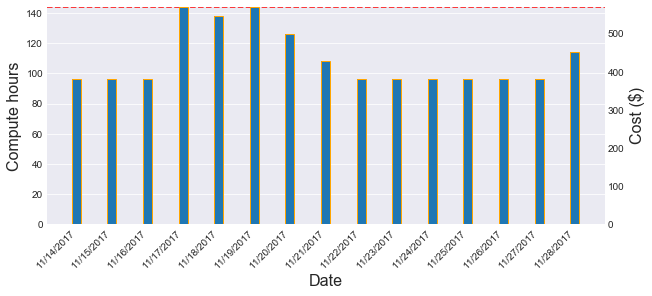

In [17]:
# Get data between starting and ending dates
start, end = '2017-11-14', '2017-11-28'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]
# Get data for usage of virtual machines
mask = subdata['ServiceName'] == 'Virtual Machines'
subdata = subdata[mask]

n_nodes = 6  # Number of nodes in the pool
hour_cost = 3.96  # Compute hour cost a NC24r instance
dates = subdata['Date'].values
hours = subdata['Quantity'].values
costs = subdata['Cost'].values
hours_14_28 = ((8.0 + 10.0 / 60) +
               13.0 * 24.0 +
               (10.0 + 25.0 / 60))

print('- Total number of compute hours: {:.2f}'
      .format(hours.sum()))
print('- Number of compute hours per node: {:.2f}'
      .format(hours.sum() / n_nodes))
print('- Expected cost for the compute hours: ${:.2f}'
      .format(hours.sum() * hour_cost))
print('- Reported cost: ${:.2f}'
      .format(costs.sum()))
print('- Estimated runtime (in hours) between Nov 14 and Nov 28: {:.2f}'
      .format(hours_14_28))
print('- Expected cost based on runtime between Nov 14 and Nov 28: ${:.2f}'
      .format(hours_14_28 * n_nodes * hour_cost))
print('- Undercharged by: ${:.2f}'
      .format(hours_14_28 * n_nodes * hour_cost - costs.sum()))
plot_daily_charges(dates, hours, costs, n_nodes, hour_cost)

The usage of 6 NC24r virtual machines for the task incurred a total cost of \$6,486.5 between November 14 and November 28, 2017.
The above figure shows the number of compute hours per day and the associated cost we have been charged for by Microsoft Azure.
The red dashed line is a guideline showing the maximum number of compute hours we could have been charged per day for using 6 NC24r virtual machines (6 NC24r instances for 24 hours with a hourly price of \$3.96 for each one).
There are only 2 days (November 17 and November 19) where we have been charged for 24 hours of compute time.
The rest of the days, the number of compute hours reported on our billing statement is lower.
For example, on November 22, in the middle of the simulation, we have only been charged for 16 hours of compute time (96 hours over 6 NC24r virtual machines).
(The charges for November 22, 2017, are displayed in the code cell below.)
Thus, either the task was actually not running straight for 24 hours per day or Microsoft Azure has been undercharging us.

In [18]:
# Get data on a specific day
date = '2017-11-22'
mask = pandas.to_datetime(data['Date']) == date
subdata = data[mask]
# Get data for usage of virtual machines
mask = subdata['ServiceName'] == 'Virtual Machines'
subdata = subdata[mask]

n_nodes = 6  # Number of nodes in the pool
hour_cost = 3.96  # Compute hour cost for a NC24r instance
hours = subdata['Quantity'].values.sum()
costs = subdata['Cost'].values.sum()

print('On {}:'.format(date))
print(' - Number of compute hours: {}'.format(hours))
print(' - Number of nodes: {}'.format(n_nodes))
print(' - Calculated number of hours job running: {}'.format(hours / n_nodes))
print(' - Reported cost: ${:.2f}'.format(costs))
print(' - Calculated compute hour cost: ${:.2f}'.format(costs / hours))
subdata

On 2017-11-22:
 - Number of compute hours: 96.0
 - Number of nodes: 6
 - Calculated number of hours job running: 16.0
 - Reported cost: $380.16
 - Calculated compute hour cost: $3.96


,Date,ServiceName,ServiceType,ServiceRegion,ServiceResource,Quantity,Cost
1212,11/22/2017,Virtual Machines,Standard_NC24r VM,US East,Compute Hours,96.0,380.16


During late March 2018, we had the confirmation that we have been undercharged.
Microsoft Azure told us (private communication) that their Engineering team identified a bug (at the beginning of March 2018) related to our Sponsorship billing system and broader Azure usage system, in which costumers were being under-billed for services leveraged.

There is 331 hours between November 14 (3:50 pm), and November 28 (2:10 pm), 2018, while we have been charged for 273 hours.
(Since we killed the job, we do not have the PETSc runtime.)
For 331 hours, we would have been charged for \$7,854.7.
Thus, we estimate we have been undercharged by approximatively \$1,368.

**Why did we kill the job?**

Our simulations run for a prescribed number of time steps and we save the numerical solution (pressure and velocity fields, convective and diffusive terms) at a certain frequency.
In addition, we also compute and write into a file the aerodynamic forces every time step.
It appears that the aerodynamic forces were written to the file for the last time on November 25, 2017 (at 10:25 am), at a time step different from the final time step.
(This date corresponds to the last time the file was modified.)
Something went wrong for this task and the simulation was not anymore running normally.
It took me about three days to realize that something was wrong!
Why so long?
I usually check the status of the task to make sure everything is alright.
The pool and job's task were still respectively marked as  "active" and "running", even if the computation was not running.
I even logged into the nodes an ran the "top" command-line utility to check the processes were still running.
However, the compute nodes on the Azure portal were now marked as IDLE.
Seeking for help to Microsoft Azure, Fred Park, software engineer and main developer of Batch Shipyard, told us that Batch tasks have a 7-day time-limit enforced (from the time the task is submitted), a restriction that was not yet mentioned in the official documentation of Microsoft Azure.
(As pointed out by Fred Park, there is a note at the end of the documentation for Batch Shipyard; we missed it...)
Three days past between the last time the solution was output to files and the time we had the confirmation that the simulation was not running anymore so we had to kill the job and restart it.

Something that still remains unclear to us is that if there is a 7-day time-limit on Azure Batch task, why did our task ran for about 10 days? (From November 14 to November 25, 2018, at 10:25 am.)
No answer has been provided to us regarding this issue.

Therefore, let's redo our cost analysis for this task by considering only the period the simulation was actually computing the solution. Let's assume that:

* the task started at 3:50 pm on November 14, 2017 (and ran for 8 hours and 10 minutes that day);
* the task ran normally until 10:25 am on November 25, 2017 (and ran for 10 hours and 25 minutes that day).

- Total number of compute hours: 1298.50
- Number of compute hours per node: 216.42
- Expected cost for the compute hours: $5142.06
- Effective cost: $5142.06


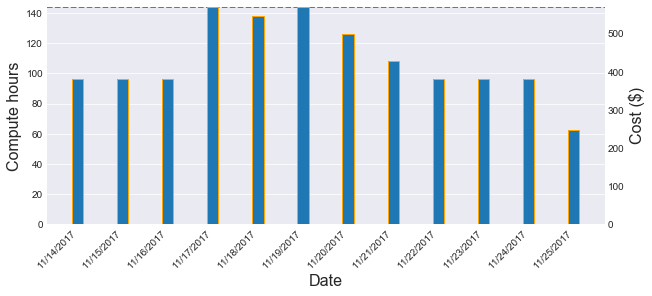

In [19]:
# Get data between starting and ending dates
start, end = '2017-11-14', '2017-11-25'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]
# Get data for the usage of virtual machines
mask = subdata['ServiceName'] == 'Virtual Machines'
subdata = subdata[mask]

n_nodes = 6  # Number of nodes in the pool
hour_cost = 3.96  # Compute hour cost a NC24r instance
dates = subdata['Date'].values
hours = subdata['Quantity'].values
costs = subdata['Cost'].values

# Assume run for 10 hours and 25 minutes on last day
last_hours = (10.0 + 25.0 / 60) * n_nodes
if hours[-1] > last_hours:
    hours[-1] = last_hours
    costs[-1] = hours[-1] * hour_cost

print('- Total number of compute hours: {:.2f}'
      .format(hours.sum()))
print('- Number of compute hours per node: {:.2f}'
      .format(hours.sum() / n_nodes))
print('- Expected cost for the compute hours: ${:.2f}'
      .format(hours.sum() * hour_cost))
print('- Effective cost: ${:.2f}'.format(costs.sum()))
plot_daily_charges(dates, hours, costs, n_nodes, hour_cost)

By considering only the period of time, the computation was effective (i.e., the task was not stuck and the solution was written to files), we end up with a cost of \$5,142 for this task.

We can also estimate the money lost because we were not aware of this 7-day time-limit restriction for Azure Batch tasks.

Total cost charged for the virtual machines while simulation not running: $1344.42


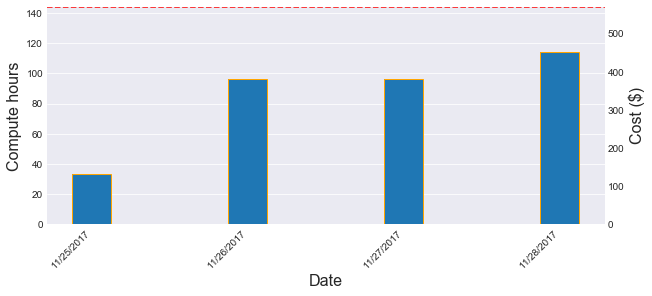

In [20]:
# Get data within given period
start, end = '2017-11-25', '2017-11-28'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]
# Get data for the usage of virtual machines
mask = subdata['ServiceName'] == 'Virtual Machines'
subdata = subdata[mask]

n_nodes = 6  # Number of nodes in the pool
hour_cost = 3.96  # Compute hour cost a NC24r instance
dates = subdata['Date'].values
hours = subdata['Quantity'].values
costs = subdata['Cost'].values

# Get the charges for the day the simulation was not computing anymore
last_hours = (10.0 + 25.0 / 60) * n_nodes
if hours[0] > last_hours:
    hours[0] -= last_hours
    costs[0] -= last_hours * hour_cost
    
print('Total cost charged for the virtual machines '
      'while simulation not running: ${:.2f}'
      .format(costs.sum()))
plot_daily_charges(dates, hours, costs, n_nodes, hour_cost)

#### Other costs

Between November 14 and November 29, 2017, we have also been charged for `Networking`, `Data Management`, and `Storage`.

In [21]:
# Get data within given period
start, end = '2017-11-14', '2017-11-29'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]
# Get and print cost for other services
service_names = ['Networking', 'Data Management', 'Storage']
for name in service_names:
    mask = subdata['ServiceName'] == name
    print('- {} cost: ${:.2f}'.format(name,
                                      subdata[mask]['Cost'].sum()))
    service_resources = subdata[mask]['ServiceResource'].unique()
    for resource in service_resources:
        print('\t- ' + resource)

- Networking cost: $20.59
	- Data Transfer In (GB)
	- Data Transfer Out (GB)
- Data Management cost: $2.53
	- Standard IO - Table Read Operation Units (in 10,000s)
	- Standard IO - Block Blob Write Operation Units (in 10,000s)
	- Standard IO - Block Blob Read Operation Units (in 10,000s)
	- Standard IO - File Protocol Operation Units (in 10,000s)
	- Standard IO - File Read Operation Units (in 10,000s)
	- Standard IO - File Delete Operation Units (in 10,000s)
	- Standard IO - Block Blob Delete Operation Units (in 10,000s)
	- Standard IO - Table Scan Operation Units (in 10,000s)
	- Standard IO - Table Write Operation Units (in 10,000s)
	- Standard IO - Table Batch Write Operation Units (in 10,000s)
	- Standard IO - File List Operation Units (in 10,000s)
	- Standard IO - Block Blob List Operation Units (in 10,000s)
	- Standard IO - File Write Operation Units (in 10,000s)
	- Standard IO - Queue Operation Units (in 10,000s)
- Storage cost: $11.28
	- Standard IO - Table (GB)
	- Standard Mana

In [22]:
# Get data within given period
start, end = '2017-11-28', '2017-11-29'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]
# Get networking charges
mask = subdata['ServiceName'] == 'Networking'
print('Networking cost: ${:.2f}'.format(subdata[mask]['Cost'].sum()))

Networking cost: $18.82


### Re=2,000, AoA=35$^o$ (mesh B) - first restart

We restarted the simulation on the fine grid from the last time-step saved.
The task was submitted on November 29, 2017 (at 2:45 pm), in a pool of 6 NC24r nodes, and completed by December 5, 2017 (at 4 pm).

Let's have a look at the different services we were being charged during that period:

In [23]:
# Get data within given period
start, end = '2017-11-29', '2017-12-05'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]
# Get costs for different services
service_names = subdata['ServiceName'].unique()
for name in service_names:
    mask = subdata['ServiceName'] == name
    print('- {}: ${:.2f}'
          .format(name, subdata[mask]['Cost'].sum()))

- Data Management: $1.36
- Networking: $12.69
- Storage: $9.09
- Virtual Machines: $2496.19


#### Virtual Machines (Compute Hours)

- Total number of compute hours: 630.35
- Number of compute hours per node: 105.06
- PETSc runtime in hours: 144.19
- Expected cost based on the number of compute hours: $2496.19
- Expexted cost based on the PETSc runtime: $3426.06
- Reported cost: $2496.19
- Undercharged by $929.87


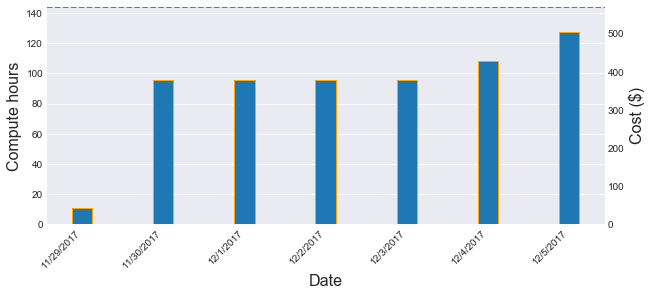

In [24]:
# Get data within given period
start, end = '2017-11-29', '2017-12-05'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]
# Get data for the usage of virtual machines
mask = subdata['ServiceName'] == 'Virtual Machines'
subdata = subdata[mask]

n_nodes = 6  # Number of nodes in the pool
hour_cost = 3.96  # Compute hour cost a NC24r instance
petsc_runtime = 5.191E+05 / 3600.0  # PETSc runtime in hours
dates = subdata['Date'].values
hours = subdata['Quantity'].values
costs = subdata['Cost'].values

print('- Total number of compute hours: {:.2f}'
      .format(hours.sum()))
print('- Number of compute hours per node: {:.2f}'
      .format(hours.sum() / n_nodes))
print('- PETSc runtime in hours: {:.2f}'.format(petsc_runtime))
print('- Expected cost based on the number of compute hours: ${:.2f}'
      .format(hours.sum() * hour_cost))
print('- Expexted cost based on the PETSc runtime: ${:.2f}'
      .format(petsc_runtime * n_nodes * hour_cost))
print('- Reported cost: ${:.2f}'.format(costs.sum()))
print('- Undercharged by ${:.2f}'
      .format(petsc_runtime * n_nodes * hour_cost - costs.sum()))
plot_daily_charges(dates, hours, costs, n_nodes, hour_cost)

The figure above shows the number of compute hours and the cost charged daily when the task was running.
The dashed red line shows the values as if the simulation was computing during the full day.

For this task, we have been charged for the usage of virtual machines for a total of 630.4 compute hours (105.1 hours per virtual machine), which represents a cost of \2,496.2 (with a hourly price of \$3.96 per NC24r instance).
From the figure above, it appears again that we have been undercharged for this task.
As the task completed normally, we have a runtime reported by the PETSc routine (144.2 hours), about 39 hours more than what we have been charged for.
We estimate that Microsoft Azure undercharged us by about \$930 for this task.

### Re=2,000, AoA=35$^o$ (mesh B) - second restart

Finally, we restarted the simulation one last time to compute additional time units while avoiding the time-limit enforced on Azure Batch tasks.
The task was submitted on December 7, 2017, at 7:20 pm and completed by December 11, 2017, at 4:10 am.

Within this period, we have been charged for `Virtual Machines`, `Data Management`, `Storage`, and `Networking`, with most of the cost incurred by the use of virtual machines.

In [25]:
# Get data within given period
start, end = '2017-12-05', '2017-12-11'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]
# Get costs for different services
service_names = subdata['ServiceName'].unique()
for name in service_names:
    mask = subdata['ServiceName'] == name
    print('- {}: ${:.2f}'
          .format(name, subdata[mask]['Cost'].sum()))

- Data Management: $1.04
- Networking: $17.06
- Storage: $11.93
- Virtual Machines: $1971.29


#### Virtual Machines (Compute Hours)

- Total number of compute hours: 398.13
- Number of compute hours per node: 66.36
- PETSc runtime in hours: 80.94
- Expected cost based on the number of compute hours: $1576.61
- Expexted cost based on the PETSc runtime: $1923.24
- Reported cost: $1576.61
- Undercharged by $346.63


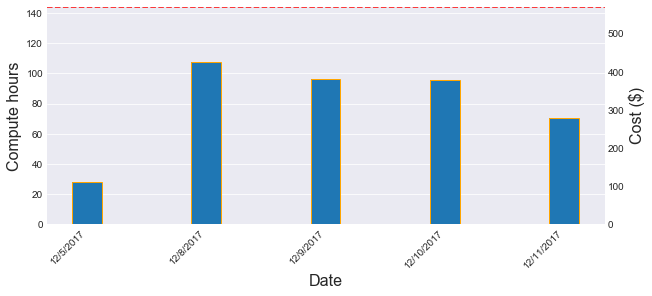

In [26]:
# Get data within given period
start, end = '2017-12-05', '2017-12-11'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]
# Get data for the usage of virtual machines
mask = subdata['ServiceName'] == 'Virtual Machines'
subdata = subdata[mask]

n_nodes = 6  # Number of nodes in the pool
hour_cost = 3.96  # Compute hour cost a NC24r instance
petsc_runtime = 2.914E+05 / 3600.0  # PETSc runtime in hours
dates = subdata['Date'].values
hours = subdata['Quantity'].values
costs = subdata['Cost'].values
first_hours = (4.0 + 40.0 / 60) * n_nodes
if hours[0] > first_hours:
    hours[0] = first_hours
    costs[0] = first_hours * hour_cost

print('- Total number of compute hours: {:.2f}'
      .format(hours.sum()))
print('- Number of compute hours per node: {:.2f}'
      .format(hours.sum() / n_nodes))
print('- PETSc runtime in hours: {:.2f}'.format(petsc_runtime))
print('- Expected cost based on the number of compute hours: ${:.2f}'
      .format(hours.sum() * hour_cost))
print('- Expexted cost based on the PETSc runtime: ${:.2f}'
      .format(petsc_runtime * n_nodes * hour_cost))
print('- Reported cost: ${:.2f}'.format(costs.sum()))
print('- Undercharged by ${:.2f}'
      .format(petsc_runtime * n_nodes * hour_cost - costs.sum()))
plot_daily_charges(dates, hours, costs, n_nodes, hour_cost)

For this task, our billing statement report that we have been charged for 398 compute hours for the usage of virtual machines (66.4 hours per instance), which incurred a cost of \$1,576.6.
But again, the figure above shows that we have been undercharged.
The PETSc runtime is about 81 hours; using 6 NC24r nodes, we would have expected a bill of $1,923.2.
We have been undercharged by \$347 for this task.

### Extra simulations

Two additional tasks were submitted to Azure Batch on December 22, 2017 (at 12:30 pm):

1. simulation of 100,000 time steps on a 46-million-cell mesh for the flow around a snake cylinder with a 35-degree angle of attack at Reynolds number 1,000, and
2. simulation of 100,000 time steps on a 46-million-cell mesh for the flow around a snake cylinder with a 30-degree angle of attack at Reynolds number 2,000.

Each task was submitted to its own Batch pool of 2 NC24r nodes.

The first task completed on December 27, 2017 (at 6 am) and PETSc reports a runtime of 113.5 hours.
The second task completed two days later (at 9:50 am); PETSc reports a runtime of 165.4 hours.

In [27]:
# Get data within specific period
start, end = '2017-12-22', '2017-12-29'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]
# Get and print the cost per service during that period
service_names = subdata['ServiceName'].unique()
for name in service_names:
    mask = subdata['ServiceName'] == name
    print('- {}: ${:.2f}'
          .format(name, subdata[mask]['Cost'].sum()))

- Data Management: $3.51
- Networking: $12.31
- Storage: $16.94
- Virtual Machines: $1721.86


#### Virtual Machines (Compute Hours)

- Total number of compute hours: 434.28
- Number of compute hours per node: 108.57
- PETSc runtime in hours: 278.86
- Calculated cost based on the number of compute hours: $1719.76
- Calculated cost based on the PETSc runtime: $2208.58
- Reported costs: $1719.76
- Undercharged by $488.82


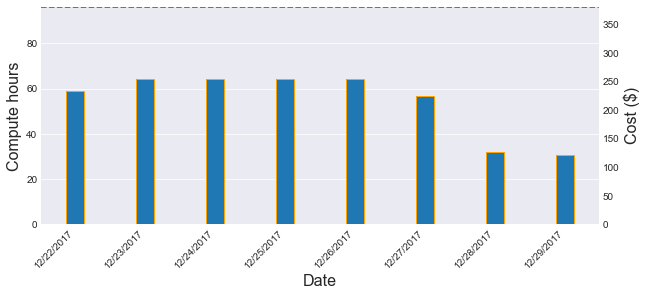

In [28]:
# Get data within specific period
start, end = '2017-12-22', '2017-12-29'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]
# Get data for the usage of virtual machines
mask = subdata['ServiceName'] == 'Virtual Machines'
subdata = subdata[mask]

n_nodes_task1 = 2  # Total number of nodes
n_nodes_task2 = 2  # Total number of nodes
petsc_runtime_task1 = 4.086E+05 / 3600.0  # PETSc runtime in hours
petsc_runtime_task2 = 5.953E+05 / 3600.0  # PETSc runtime in hours
hour_cost = 3.96  # Compute hour cost a NC24r instance
dates = subdata['Date'].values[1:]
hours = subdata['Quantity'].values[1:]
costs = subdata['Cost'].values[1:]

print('- Total number of compute hours: {:.2f}'
      .format(hours.sum()))
print('- Number of compute hours per node: {:.2f}'
      .format(hours.sum() / (n_nodes_task1 + n_nodes_task2)))
print('- PETSc runtime in hours: {:.2f}'
      .format(petsc_runtime_task1 + petsc_runtime_task2))
print('- Calculated cost based on the number of compute hours: ${:.2f}'
      .format(hours.sum() * hour_cost))
petsc_cost = (petsc_runtime_task1 * n_nodes_task1 * hour_cost +
              petsc_runtime_task2 * n_nodes_task2 * hour_cost)
print('- Calculated cost based on the PETSc runtime: ${:.2f}'
      .format(petsc_cost))
print('- Reported costs: ${:.2f}'.format(costs.sum()))
print('- Undercharged by ${:.2f}'.format(petsc_cost - costs.sum()))
plot_daily_charges(dates, hours, costs,
                   n_nodes_task1 + n_nodes_task2, hour_cost)

Comparing the costs reported in our billing statement with the cost based on the PETSc runtime, we estimate that we have been undercharged by \$489 for those two task.

In [29]:
# Get data on a specific day
date = '2017-12-22'
mask = pandas.to_datetime(data['Date']) == date
subdata = data[mask]
# Get data for usage of virtual machines
mask = subdata['ServiceName'] == 'Virtual Machines'
subdata[mask]

,Date,ServiceName,ServiceType,ServiceRegion,ServiceResource,Quantity,Cost
1570,12/22/2017,Virtual Machines,Standard_NC24 VM,US East,Compute Hours,0.583344,2.100038
1576,12/22/2017,Virtual Machines,Standard_NC24r VM,US East,Compute Hours,58.950058,233.442230


#### Networking (Data Transfer)

In [30]:
# Get data within specific period
start, end = '2017-12-22', '2017-12-29'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]
# Get data for networking
mask = subdata['ServiceName'] == 'Networking'
subdata = subdata[mask]

print('Networking charge: ${:.2f}'.format(subdata['Cost'].sum()))

Networking charge: $12.31


Each simulation generated 125 GB of data.
The numerical solution for the run at Reynolds number 1,000 and a 35-degree angle of attack was transferred from Azure Storage to our local machine on December 22, 2017.
The numerical solution of the second run was transferred two days later.
Each transfer cost about \$6.

In [31]:
dates = ['2017-12-27', '2017-12-29']
mask = ((pandas.to_datetime(data['Date']) == dates[0]) |
        (pandas.to_datetime(data['Date']) == dates[1]))
subdata = data[mask]
mask = ((subdata['ServiceName'] == 'Networking') &
        (subdata['ServiceResource'] == 'Data Transfer Out (GB)'))
subdata[mask]

,Date,ServiceName,ServiceType,ServiceRegion,ServiceResource,Quantity,Cost
1644,12/27/2017,Networking,All,Zone 1,Data Transfer Out (GB),124.503279,6.038409
1674,12/29/2017,Networking,All,Zone 1,Data Transfer Out (GB),124.506586,6.038569


#### Data Management

In [32]:
# Get data within specific period
start, end = '2017-12-22', '2017-12-29'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]
# Get data for data management
mask = subdata['ServiceName'] == 'Data Management'
subdata = subdata[mask]
# Get and print charges for data management
service_resources = subdata['ServiceResource'].unique()
print('Data Management costs:')
for resource in service_resources:
    mask = subdata['ServiceResource'] == resource
    cost = subdata[mask]['Cost'].sum()
    print('- {}: ${:.2f}'.format(resource, cost))

Data Management costs:
- Standard IO - Table Read Operation Units (in 10,000s): $0.00
- Standard IO - Block Blob Write Operation Units (in 10,000s): $0.00
- Standard IO - Block Blob Read Operation Units (in 10,000s): $0.00
- Standard IO - File Protocol Operation Units (in 10,000s): $0.18
- Standard IO - File Read Operation Units (in 10,000s): $0.19
- Standard IO - File Delete Operation Units (in 10,000s): $0.00
- Standard IO - Block Blob Delete Operation Units (in 10,000s): $0.00
- Standard IO - Table Scan Operation Units (in 10,000s): $0.00
- Standard IO - Table Write Operation Units (in 10,000s): $0.00
- Standard IO - Table Batch Write Operation Units (in 10,000s): $0.00
- Standard IO - File List Operation Units (in 10,000s): $0.00
- Standard IO - Block Blob List Operation Units (in 10,000s): $0.00
- Standard IO - File Write Operation Units (in 10,000s): $3.14


---